* The idea of today's exercise is to do a more powerful EDA. For example:
* do same aggregations, explore one shop in detail, see for a single product how many sales it has across time, what are the most sold * items categories per month...
* The idea is that you have yo be very curious with the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import glob
from googletrans import Translator

import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import matplotlib.pyplot as plt
import sklearn  as skl
import pickle
import joblib
from sklearn.model_selection import TimeSeriesSplit


from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24





Pandas   1.2.0
Sklearn  0.24.0


In [2]:
path = r'C:\Users\Amash\Projects\Strive\Exercises\Module_4_Feature_Engineering\Week_1\D3_Num_Encoding\data'

In [3]:
files = glob.glob(path + '\*.csv')

In [4]:
files

['C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\items.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\item_categories.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\sales_train.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\sample_submission.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\shops.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_1\\D3_Num_Encoding\\data\\test.csv']

In [5]:
dfs = []
for file in files:
    df_name = file[98:-4]
    dfs.append(df_name)
    vars()[file[98:-4]] = pd.read_csv(file)

In [6]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
path_translated = r'C:\Users\Amash\Projects\Strive\Exercises\Module_4_Feature_Engineering\Week_1\D4_Cat_Encoding\data\translated'

In [8]:
files_translated = glob.glob(path_translated + '\*.csv')

In [9]:
files_translated[0][109:-4]

'items_translated'

In [10]:

for file in files_translated:
    df_name = file[109:-4]
    dfs.append(df_name)
    vars()[file[109:-4]] = pd.read_csv(file)

In [11]:
items_merged = items_translated.merge(items, on='item_id').drop('item_name', axis=1)

In [12]:
items_merged

,item_id,item_name_translated,item_category_id
0,0,!! IN THE POWER OF HAPPINESS (PLAST) D,40
1,1,! ABBYY FineReader 12 Professional Edition Ful...,76
2,2,*** IN THE GLORY OF THE GLORY (UNV) D,40
3,3,*** BLUE WAVE (Univ) D,40
4,4,*** BOX (GLASS) D,40
...,...,...,...
22165,22165,"Nuclear Titbit 2 [PC, Digital Version]",31
22166,22166,Query language 1C: Enterprise [Digital version],54
22167,22167,The query language is 1C: Enterprise 8 (+ CD)....,49
22168,22168,Egg for Little Inu,62


In [13]:
sales_train.merge(items, on='item_id', how='left').merge(item_categories, on='item_category_id', how='left').merge(shops, on='shop_id', how='left')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


In [14]:
df_full = sales_train.merge(items_merged, on='item_id', how='left').merge(shops_translated, on='shop_id', how='left').merge(item_categories_translated, on='item_category_id', how='left')

In [15]:
df_full['date'] = pd.to_datetime(df_full['date'])

In [16]:
df_full.set_index('date', inplace=True)

In [17]:
df_full.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,item_category_id,shop_name_translated,item_category_name_translated
date,,,,,,,,,
2013-02-01,0,59,22154,999.00,1.0,SCENE 2012 (BD),37,"Yaroslavl Shopping center ""Altair""",Cinema - Blu-Ray
2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl
2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl
2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Moscow TRK ""Atrium""",Music - Vinyl
2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Moscow TRK ""Atrium""",Music - CD of branded production


In [18]:
count_by_shopname_cat = df_full.groupby(['shop_name_translated', 'item_category_name_translated'])['item_cnt_day'].sum().reset_index().sort_values(by='item_cnt_day', ascending=False).reset_index(drop=True)

In [19]:
count_by_shopname_cat.head()

,shop_name_translated,item_category_name_translated,item_cnt_day
0,"Moscow ТЦ ""Семеновский""",Cinema - DVD,76069.0
1,"Moscow TRK ""Atrium""",Cinema - DVD,45176.0
2,"Khimki ТЦ ""Mega""",Cinema - DVD,44904.0
3,"Yakutsk Ordzhonikidze, 56",Cinema - DVD,44589.0
4,"Moscow ТЦ ""MEGA Teply Stan"" II",Cinema - DVD,38588.0


In [20]:
df_full.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,item_category_id,shop_name_translated,item_category_name_translated
date,,,,,,,,,
2013-02-01,0,59,22154,999.00,1.0,SCENE 2012 (BD),37,"Yaroslavl Shopping center ""Altair""",Cinema - Blu-Ray
2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl
2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl
2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Moscow TRK ""Atrium""",Music - Vinyl
2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Moscow TRK ""Atrium""",Music - CD of branded production


In [21]:
df_full['category'] =  df_full['item_category_name_translated'].apply(lambda x: x.split('-')[0])

In [22]:
df_full['item_name_translated'].unique()

array(['SCENE 2012 (BD)', 'DEEP PURPLE  The House Of Blue Light  LP',
       'DEEP PURPLE  Who Do You Think We Are  LP', ...,
       'WARHAMMER ACCESSORIES: Khorne Dice арт. 65-13',
       'WARHAMMER MINIATURES: Dark Elf Doomfire Warlocks арт. 85-14',
       'WARHAMMER MINIATURES: Stormcast Eternals Paladins арт. 96-12'],
      dtype=object)

In [23]:
df_full['item_category_name_translated'].nunique()

84

In [24]:
top_15_shops = df_full['shop_name_translated'].value_counts()[:15]
top_15_items = df_full['item_name_translated'].value_counts()[:15]
top_15_item_cats = df_full['item_category_name_translated'].value_counts()[:15]

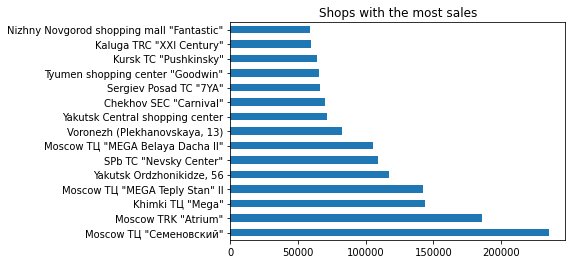

In [25]:
top_15_shops.plot(kind='barh');
plt.title('Shops with the most sales');

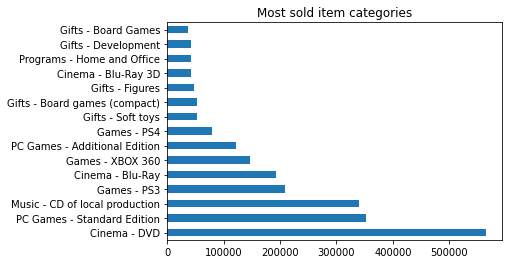

In [26]:
top_15_item_cats.plot(kind='barh');
plt.title('Most sold item categories');

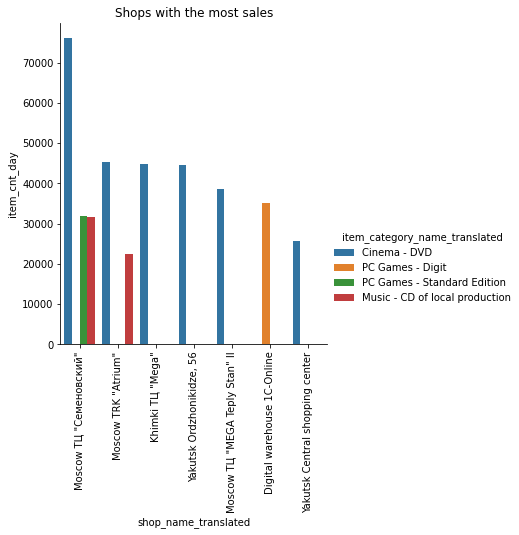

In [27]:
sns.catplot(data=count_by_shopname_cat[:10], x='shop_name_translated', y='item_cnt_day', kind='bar', hue='item_category_name_translated')
plt.xticks(rotation=90);
plt.title('Shops with the most sales');

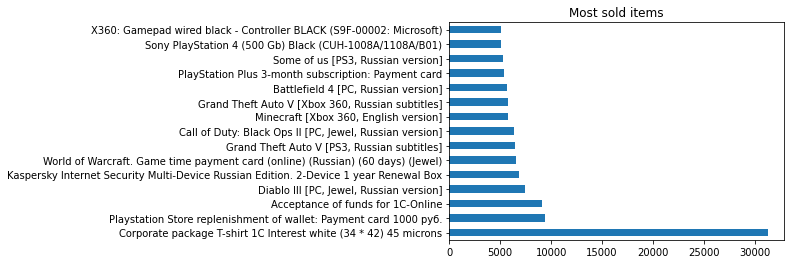

In [28]:
top_15_items.plot(kind='barh');
plt.title('Most sold items');

In [29]:
grouped_by_shop_name = df_full.reset_index().groupby(['shop_name_translated', 'date'])[['item_cnt_day']].count().sort_values(by='item_cnt_day', ascending=False)

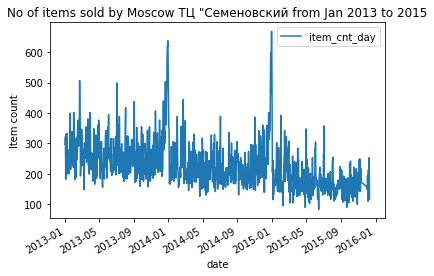

In [30]:
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].plot();
plt.ylabel('Item count');
plt.title('No of items sold by Moscow ТЦ "Семеновский from Jan 2013 to 2015');

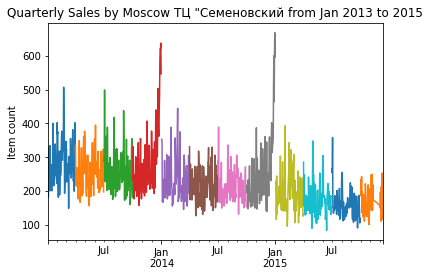

In [31]:
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].resample('Q').plot();
plt.ylabel('Item count');
plt.title('Quarterly Sales by Moscow ТЦ "Семеновский from Jan 2013 to 2015');

<Figure size 1008x720 with 0 Axes>

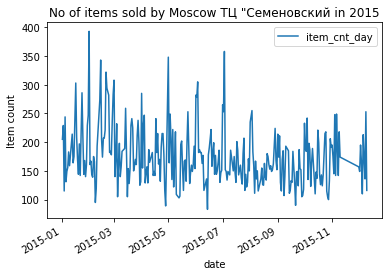

In [32]:
plt.figure(figsize=(14, 10))
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].loc['2015'].plot();
plt.ylabel('Item count');
plt.title('No of items sold by Moscow ТЦ "Семеновский in 2015');

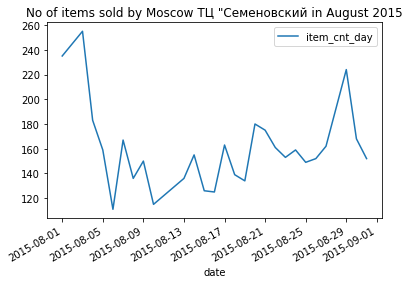

In [33]:
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].loc['2015-8'].plot();
plt.title('No of items sold by Moscow ТЦ "Семеновский in August 2015');

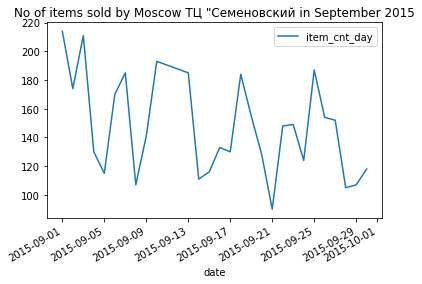

In [34]:
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].loc['2015-9'].plot();
plt.title('No of items sold by Moscow ТЦ "Семеновский in September 2015');

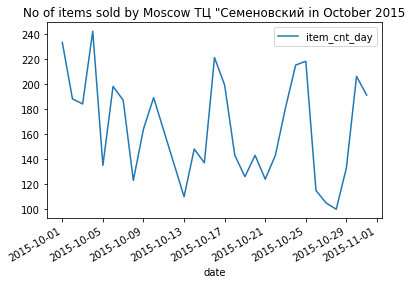

In [35]:
grouped_by_shop_name.loc['Moscow ТЦ "Семеновский"'].loc['2015-10'].plot();
plt.title('No of items sold by Moscow ТЦ "Семеновский in October 2015');

In [36]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [37]:
df_full.tail()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,item_category_id,shop_name_translated,item_category_name_translated,category
date,,,,,,,,,,
2015-10-10,33,25,7409,299.0,1.0,V/A Nu Jazz Selection (digipack),55,"Moscow TRK ""Atrium""",Music - CD of local production,Music
2015-09-10,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,"Moscow TRK ""Atrium""",Music - CD of local production,Music
2015-10-14,33,25,7459,349.0,1.0,V/A The Best Of The 3 Tenors,55,"Moscow TRK ""Atrium""",Music - CD of local production,Music
2015-10-22,33,25,7440,299.0,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Moscow TRK ""Atrium""",Music - MP3,Music
2015-03-10,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,"Moscow TRK ""Atrium""",Music - CD of local production,Music


In [38]:
test_full = test.merge(df_full.reset_index(), on=['shop_id', 'item_id'], how="left",indicator=True)

In [39]:
test_full.groupby(['shop_id', 'item_id']).head(1)

,ID,shop_id,item_id,date,date_block_num,item_price,item_cnt_day,item_name_translated,item_category_id,shop_name_translated,item_category_name_translated,category,_merge
0,0,5,5037,2014-09-21,20.0,2599.0,1.0,"NHL 15 [PS3, Russian subtitles]",19.0,"Vologda Shopping and Entertainment Center ""Mar...",Games - PS3,Games,both
13,1,5,5320,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
14,2,5,5233,2015-05-17,28.0,1199.0,2.0,"Need for Speed Rivals (Essentials) [PS3, русск...",19.0,"Vologda Shopping and Entertainment Center ""Mar...",Games - PS3,Games,both
23,3,5,5232,2015-08-28,31.0,599.0,1.0,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23.0,"Vologda Shopping and Entertainment Center ""Mar...",Games - XBOX 360,Games,both
24,4,5,5268,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327213,214195,45,18454,2014-12-16,23.0,199.0,1.0,Sat. Union 55,55.0,"Samara TC ""ParkHaus""",Music - CD of local production,Music,both
1327222,214196,45,16188,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1327223,214197,45,15757,2013-01-25,0.0,199.0,1.0,NOVIKOV ALEXANDER New collection,55.0,"Samara TC ""ParkHaus""",Music - CD of local production,Music,both
1327230,214198,45,19648,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [40]:
test_full.groupby(['shop_id', 'item_id']).get_group((45,16188))

,ID,shop_id,item_id,date,date_block_num,item_price,item_cnt_day,item_name_translated,item_category_id,shop_name_translated,item_category_name_translated,category,_merge
1327222,214196,45,16188,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [42]:
q = test_full.set_index('date')

In [42]:
X_test = test_full.drop(['ID', 'date_block_num', 'item_name_translated', 'shop_name_translated', 'item_category_name_translated'], axis=1).set_index('date').reindex(columns=['shop_id', 'item_id', 'item_price', 'item_category_id', 'item_cnt_day'])

In [43]:
X_test.head()

,shop_id,item_id,item_price,item_category_id,item_cnt_day
date,,,,,
2014-09-21,5,5037,2599.0,19.0,1.0
2014-11-29,5,5037,2599.0,19.0,1.0
2014-12-28,5,5037,1999.0,19.0,1.0
2014-12-20,5,5037,1999.0,19.0,1.0
2015-02-01,5,5037,1999.0,19.0,1.0


In [44]:
X_test = test_full.copy()

In [45]:
X_test.set_index('date', inplace=True)

In [46]:
X_test['weekday'] = X_test.index.dayofweek
X_test['month'] = X_test.index.month
X_test['day'] = X_test.index.day
X_test['is_month_start'] = X_test.index.is_month_start
X_test['is_month_end'] = X_test.index.is_month_end 
X_test['is_year_end'] = X_test.index.is_year_end

In [47]:
X_test.head()

,ID,shop_id,item_id,date_block_num,item_price,item_cnt_day,item_name_translated,item_category_id,shop_name_translated,item_category_name_translated,category,_merge,weekday,month,day,is_month_start,is_month_end,is_year_end
date,,,,,,,,,,,,,,,,,,
2014-09-21,0,5,5037,20.0,2599.0,1.0,"NHL 15 [PS3, Russian subtitles]",19.0,"Vologda Shopping and Entertainment Center ""Mar...",Games - PS3,Games,both,6.0,9.0,21.0,False,False,False
2014-11-29,0,5,5037,22.0,2599.0,1.0,"NHL 15 [PS3, Russian subtitles]",19.0,"Vologda Shopping and Entertainment Center ""Mar...",Games - PS3,Games,both,5.0,11.0,29.0,False,False,False
2014-12-28,0,5,5037,23.0,1999.0,1.0,"NHL 15 [PS3, Russian subtitles]",19.0,"Vologda Shopping and Entertainment Center ""Mar...",Games - PS3,Games,both,6.0,12.0,28.0,False,False,False
2014-12-20,0,5,5037,23.0,1999.0,1.0,"NHL 15 [PS3, Russian subtitles]",19.0,"Vologda Shopping and Entertainment Center ""Mar...",Games - PS3,Games,both,5.0,12.0,20.0,False,False,False
2015-02-01,0,5,5037,24.0,1999.0,1.0,"NHL 15 [PS3, Russian subtitles]",19.0,"Vologda Shopping and Entertainment Center ""Mar...",Games - PS3,Games,both,6.0,2.0,1.0,True,False,False


In [48]:
df_full.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,item_category_id,shop_name_translated,item_category_name_translated,category
date,,,,,,,,,,
2013-02-01,0,59,22154,999.00,1.0,SCENE 2012 (BD),37,"Yaroslavl Shopping center ""Altair""",Cinema - Blu-Ray,Cinema
2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl,Music
2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl,Music
2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Moscow TRK ""Atrium""",Music - Vinyl,Music
2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Moscow TRK ""Atrium""",Music - CD of branded production,Music


In [49]:
df_full['weekday'] = df_full.index.dayofweek
df_full['month'] = df_full.index.month
df_full['day'] = df_full.index.day
df_full['is_month_start'] = df_full.index.is_month_start
df_full['is_month_end'] = df_full.index.is_month_end 
df_full['is_year_end'] = df_full.index.is_year_end

In [50]:
item_count = df_full.groupby(['shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()

In [51]:
df_full_month = df_full.reset_index().merge(item_count, on=['shop_id', 'item_id'], how='left')#

In [52]:
df_full_month.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day_x,item_name_translated,item_category_id,shop_name_translated,item_category_name_translated,category,weekday,month,day,is_month_start,is_month_end,is_year_end,item_cnt_day_y
0,2013-02-01,0,59,22154,999.00,1.0,SCENE 2012 (BD),37,"Yaroslavl Shopping center ""Altair""",Cinema - Blu-Ray,Cinema,4,2,1,True,False,False,1.0
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl,Music,4,3,1,True,False,False,0.0
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Moscow TRK ""Atrium""",Music - Vinyl,Music,2,5,1,True,False,False,0.0
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Moscow TRK ""Atrium""",Music - Vinyl,Music,5,6,1,True,False,False,1.0
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Moscow TRK ""Atrium""",Music - CD of branded production,Music,1,1,15,False,False,False,10.0


In [53]:
df_full_month.drop(['item_cnt_day_x'], axis=1, inplace=True)

In [54]:
df_full_month.rename(columns={'item_cnt_day_y':'item_cnt_month'}, inplace=True)

In [55]:
df_full_month.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_name_translated', 'item_category_id', 'shop_name_translated',
       'item_category_name_translated', 'category', 'weekday', 'month', 'day',
       'is_month_start', 'is_month_end', 'is_year_end', 'item_cnt_month'],
      dtype='object')

In [56]:
train = df_full_month.drop(['date', 'date_block_num',  
       'item_name_translated', 'item_category_id', 'shop_name_translated',
       'item_category_name_translated'], axis=1)

In [57]:
X_test = X_test.drop(['date_block_num',  
       'item_name_translated', 'item_category_id', 'shop_name_translated',
       'item_category_name_translated', '_merge', 'ID', 'item_cnt_day'], axis=1)

In [58]:
X_test.shape

(1327235, 10)

In [59]:
X_test1 = X_test.groupby(['shop_id', 'item_id']).first().reset_index().ffill()

In [60]:
train.head()

,shop_id,item_id,item_price,category,weekday,month,day,is_month_start,is_month_end,is_year_end,item_cnt_month
0,59,22154,999.00,Cinema,4,2,1,True,False,False,1.0
1,25,2552,899.00,Music,4,3,1,True,False,False,0.0
2,25,2552,899.00,Music,2,5,1,True,False,False,0.0
3,25,2554,1709.05,Music,5,6,1,True,False,False,1.0
4,25,2555,1099.00,Music,1,1,15,False,False,False,10.0


In [61]:
X_test1.head()

,shop_id,item_id,item_price,category,weekday,month,day,is_month_start,is_month_end,is_year_end
0,2,30,359.0,Cinema,3.0,1.0,3.0,False,False,False
1,2,31,699.0,Cinema,3.0,2.0,28.0,False,True,False
2,2,32,119.0,Cinema,0.0,1.0,13.0,False,False,False
3,2,33,499.0,Cinema,2.0,5.0,1.0,True,False,False
4,2,38,499.0,Cinema,2.0,5.0,1.0,False,False,False


In [63]:
#sns.boxplot(train_full['item_cnt_day'])

In [64]:
#X_test_neg_count = X_test[X_test['item_cnt_day'] < 0]
#X_test.drop(X_test_neg_count.index, axis=0, inplace=True)

In [ ]:
#(X_test_neg_count.shape[0] / X_test.shape[0])*100

In [208]:
#train_full_neg_count = train_full[train_full['item_cnt_day'] < 0]
#train_full.drop(train_full_neg_count.index, axis=0, inplace=True)

In [207]:
#(train_full_neg_count.shape[0] / train_full.shape[0])*100

0.2505578454477734

In [234]:
#train['total_sales'] = train['item_price'] * train['item_cnt_day']
#train['monthly'] = train.resample('M')['item_cnt_day'].sum()

date
2014-05-31    7749.0
2014-06-30       0.0
2014-07-31    3301.0
2014-08-31       0.0
2014-09-30    2630.0
2014-10-31       0.0
2014-11-30       0.0
2014-12-31       0.0
2015-01-31       0.0
2015-02-28       0.0
2015-03-31    1881.0
2015-04-30    3451.0
2015-05-31       0.0
2015-06-30    2235.0
2015-07-31    1720.0
2015-08-31    2201.0
2015-09-30    1714.0
Freq: M, Name: item_cnt_day, dtype: float64

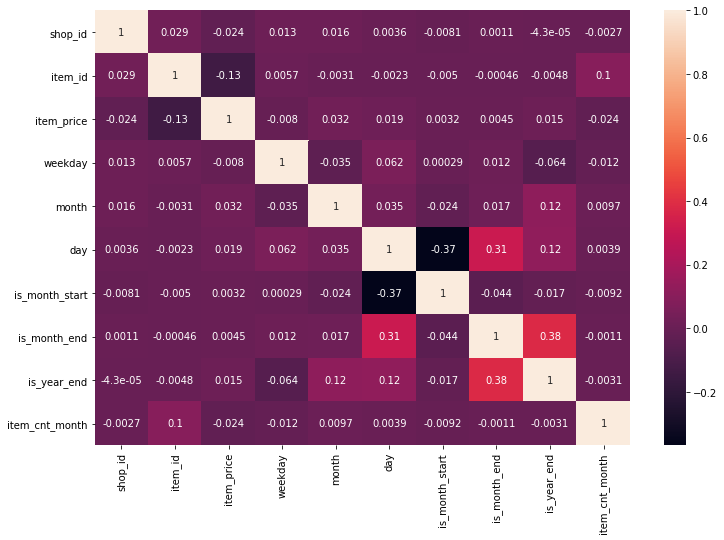

In [117]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, fmt='.2g');

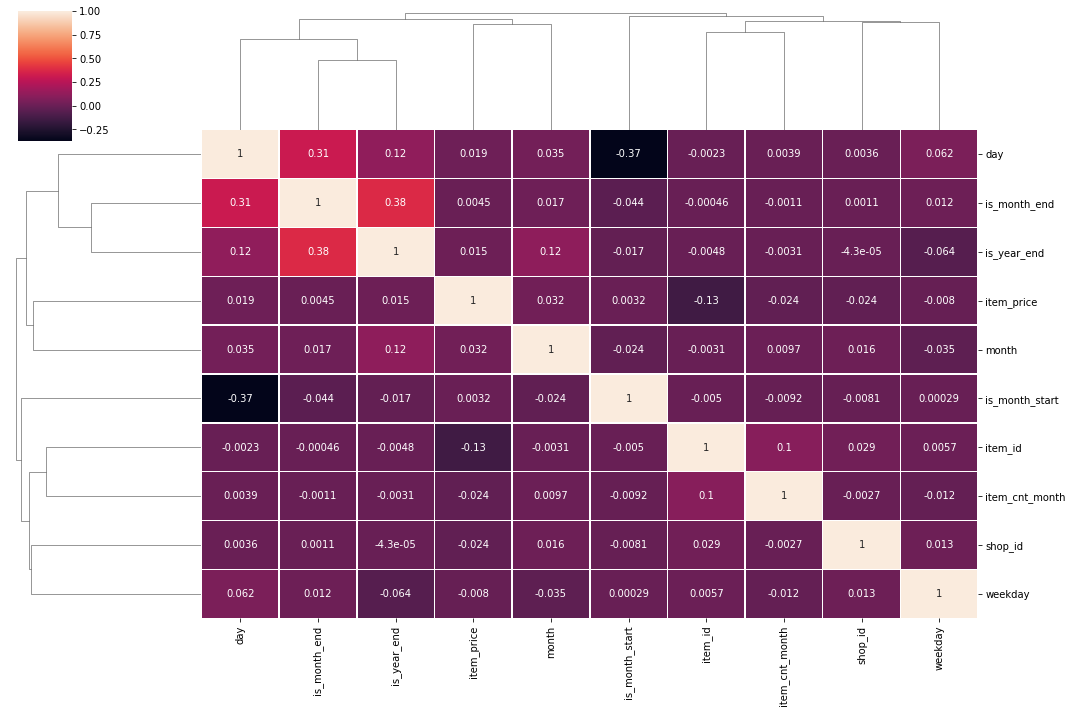

In [135]:
fig = sns.clustermap(train.corr(), annot=True, annot_kws={"size": 4, 'fontsize':10}, linewidths=.4, figsize=(15, 10))
plt.show();

In [64]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score#, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD



from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingRegressor
from xgboost               import XGBRegressor, XGBRFRegressor
from lightgbm              import LGBMRegressor
from catboost              import CatBoostRegressor


In [65]:
X = train.drop('item_cnt_month', axis=1)
y = train['item_cnt_month']

In [128]:
X.head()

,shop_id,item_id,item_price,category,weekday,month,day,is_month_start,is_month_end,is_year_end
0,59,22154,999.00,Cinema,4,2,1,True,False,False
1,25,2552,899.00,Music,4,3,1,True,False,False
2,25,2552,899.00,Music,2,5,1,True,False,False
3,25,2554,1709.05,Music,5,6,1,True,False,False
4,25,2555,1099.00,Music,1,1,15,False,False,False


In [66]:
numeric_features = ['item_price', 'item_id']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

categorical_features = ['shop_id', 'weekday', 'month', 'day', 'is_month_start', 'category', 'is_month_end', 'is_year_end']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('enc', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])




In [67]:
linear_regressors = {
    'LinearRegression': LinearRegression(n_jobs=-1),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet':ElasticNet(),
    #'LogisticRegression': LogisticRegression(),
    #'SVC': SVC()
    
}

linear_regressors = {name: pipeline.make_pipeline(preprocessor, model) for name, model in linear_regressors.items()}

tree_regressors = {
  "Decision Tree": DecisionTreeRegressor(),
  "Extra Trees": ExtraTreesRegressor(),
  "Random Forest": RandomForestRegressor(),
  "AdaBoost": AdaBoostRegressor(),
  "Skl GBM": GradientBoostingRegressor(),
  "Skl HistGBM": HistGradientBoostingRegressor(),
  "XGBoost": XGBRegressor(verbose=0),
  "LightGBM": LGBMRegressor(),
  "CatBoost": CatBoostRegressor(verbose=0)
}

tree_regressors = {name: pipeline.make_pipeline(preprocessor, model) for name, model in tree_regressors.items()}

In [68]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    # CODE HERE
    X, y, test_size=0.2, random_state=42
)

In [69]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBRegressor())
    ])



In [71]:
#clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
score = metrics.r2_score(y_val, y_pred)  

#print rmse and r2_score
print(f'RMSE  is {rmse}')
print(f'R2 Score is {score}')

RMSE  is 45.171515637846184
R2 Score is 0.9948746371284407


In [72]:
clf.score(x_train, y_train)

0.9950285863550924

In [73]:
clf.score(x_val, y_val)

0.9948746371284407

In [74]:
#clf.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['item_price', 'item_id']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('enc',
                                                                   OneHotEncoder())]),
                                                  ['shop_id', 'weekday',
                                                   'month', 'day',
                                                   'is_month_st...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [88]:
X_test1.fillna(method='bfill', inplace=True)#.isna().sum()

In [89]:
pred = clf.predict(X_test1)

In [90]:
sub = pd.DataFrame(pred, columns=['item_cnt_month']).reset_index().rename(columns={'index':'ID'})

In [95]:
sub['item_cnt_month']

0         20.0
1         20.0
2         20.0
3          0.0
4          0.0
          ... 
214195    18.0
214196    18.0
214197     4.0
214198    20.0
214199    20.0
Name: item_cnt_month, Length: 214200, dtype: float32

In [94]:
sub['item_cnt_month'] = sub['item_cnt_month'].clip(lower=0, upper=20)

In [92]:
sub['item_cnt_month'] = sub['item_cnt_month'].round()

In [96]:
#sub.to_csv('submission.csv', index=False)

In [77]:
abc = df_full.loc['2015-10']

In [122]:
index_month = df_full['2015'].index.month

In [132]:
df_by_month = df_full['2015'].groupby(['shop_id',	'item_id', index_month]).sum()#.groupby(index_month).sum()

In [133]:
df_by_month

date_block_num  item_price  item_cnt_day  \
shop_id item_id date                                             
2       31      10                33       399.0           1.0   
        32      5                 26       149.0           1.0   
                8                 31       149.0           1.0   
        33      2                 25       199.0           1.0   
                4                 27       199.0           1.0   
...                              ...         ...           ...   
59      22164   2                 25       749.0           1.0   
                3                 26       749.0           1.0   
                4                 54      1398.0           2.0   
                7                 30       699.0           1.0   
                11                25       749.0           1.0   

                      item_category_id  weekday  month  day  is_month_start  \
shop_id item_id date                                                          
2       31      10                  37        6     10   25               0   
        32      5                   40        6      5    3               0   
                8                   40        4      8   28               0   
        33      2                   37        1      2   17               0   
                4                   37        1      4   14               0   
...                                ...      ...    ...  ...             ...   
59      22164   2                   37        4      2   13               0   
                3                   37        6      3   29               0   
                4                   74        5      8   52               0   
                7                   37        1      7   21               0   
                11                  37        0     11    2               0   

                      is_month_end  is_year_end  
shop_id item_id date                             
2       31      10               0            0  
        32      5                0            0  
                8                0            0  
        33      2                0            0  
                4                0            0  
...                            ...          ...  
59      22164   2                0            0  
                3                0            0  
                4                1            0  
                7                0            0  
                11               0            0  

[399786 rows x 10 columns]

In [131]:
df_by_month#.head()

item_price  item_cnt_day  item_category_id  \
shop_id item_id date_block_num                                               
2       31      33                   399.0           1.0                37   
        32      26                   149.0           1.0                40   
                31                   149.0           1.0                40   
        33      25                   199.0           1.0                37   
                27                   199.0           1.0                37   
...                                    ...           ...               ...   
59      22162   31                   349.0           1.0                40   
        22164   25                  1498.0           2.0                74   
                26                   749.0           1.0                37   
                27                  1398.0           2.0                74   
                30                   699.0           1.0                37   

                                weekday  month  day  is_month_start  \
shop_id item_id date_block_num                                        
2       31      33                    6     10   25               0   
        32      26                    6      5    3               0   
                31                    4      8   28               0   
        33      25                    1      2   17               0   
                27                    1      4   14               0   
...                                 ...    ...  ...             ...   
59      22162   31                    6     11    8               0   
        22164   25                    4     13   15               0   
                26                    6      3   29               0   
                27                    5      8   52               0   
                30                    1      7   21               0   

                                is_month_end  is_year_end  
shop_id item_id date_block_num                             
2       31      33                         0            0  
        32      26                         0            0  
                31                         0            0  
        33      25                         0            0  
                27                         0            0  
...                                      ...          ...  
59      22162   31                         0            0  
        22164   25                         0            0  
                26                         0            0  
                27                         1            0  
                30                         0            0  

[353855 rows x 9 columns]

In [117]:
df_by_month['item_cnt_day']

date
1     1.180607
2     1.211349
3     1.232438
4     1.273608
5     1.284588
6     1.222106
7     1.178898
8     1.197542
9     1.342618
10    1.239027
11    1.303157
12    1.271359
Name: item_cnt_day, dtype: float64

In [ ]:
cv = TimeSeriesSplit()

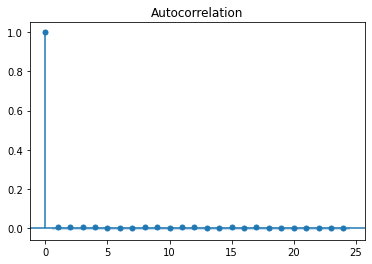

In [80]:
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(abc['item_cnt_day'], lags=24)

# Show plot
plt.show()

In [99]:
xyz = abc.reset_index()[['date', 'item_cnt_day']].set_index('date')

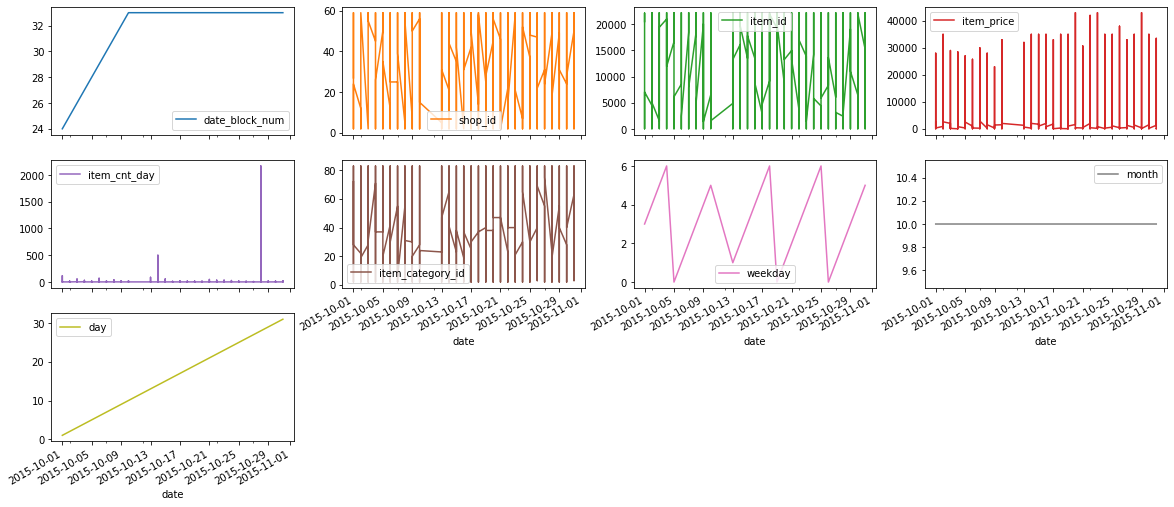

In [110]:
abc.plot(subplots=True, layout=(4,4), figsize=(20,16), sharex=True, sharey=False);

In [81]:
import statsmodels.api as sm


In [103]:
decomposition = sm.tsa.seasonal_decompose( abc['2015'])
fig = decomposition.plot()
plt.show()

ValueError: could not convert string to float: 'Фигурка Far Cry 4 Pagan Min King Of Kyrat 24см'

In [ ]:
decompo_seasonal = decomposition.seasonal
ax = decomp_seasonal.plot(figsize=(14,2))

In [162]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    # CODE HERE
    X, y, test_size=0.2, random_state=0
)

#for model_name, model in linear_regressors.items():    
    # CODE HERE
    # TRAIN PIPELINE (PREPRO + MODEL) WITH TRAIN DATA
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    score = metrics.r2_score(y_val, y_pred)  

    #print rmse and r2_score
    print(f'RMSE of {model_name} is {rmse}')
    print(f'R2 Score of {model_name} is {score}')
    print()



RMSE of LinearRegression is 625.3630107384378
R2 Score of LinearRegression is 0.07806846712465088

RMSE of Lasso is 628.3023963460386
R2 Score of Lasso is 0.06938141363742978

RMSE of Ridge is 625.3700953482247
R2 Score of Ridge is 0.07804757825835829

RMSE of ElasticNet is 644.5491404235669
R2 Score of ElasticNet is 0.02063099152447312



In [ ]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    # CODE HERE
    X, y, test_size=0.2, random_state=0
)

for model_name, model in tree_regressors.items():    
    # CODE HERE
    # TRAIN PIPELINE (PREPRO + MODEL) WITH TRAIN DATA
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    score = metrics.r2_score(y_val, y_pred)  

    #print rmse and r2_score
    print(f'RMSE of {model_name} is {rmse}')
    print(f'R2 Score of {model_name} is {score}')
    print()



In [243]:
test_full.shape

(1224439, 5)

In [ ]:
linear_regressors = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet':ElasticNet(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor()
}

In [ ]:
tree_regressors = {
  "Decision Tree": DecisionTreeRegressor(),
  "Extra Trees": ExtraTreesRegressor(),
  "Random Forest": RandomForestRegressor(),
  "AdaBoost": AdaBoostRegressor(),
  "Skl GBM": GradientBoostingRegressor(),
  "Skl HistGBM": HistGradientBoostingRegressor(),
  "XGBoost": XGBRegressor(verbose=0),
  "LightGBM": LGBMRegressor(),
  "CatBoost": CatBoostRegressor(verbose=0)
}

tree_regressors = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_regressors.items()}

In [ ]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    # CODE HERE
    x, y, test_size=0.2, stratify=y, random_state=0
)

for model_name, model in tree_regressors.items():    
    # CODE HERE
    # TRAIN PIPELINE (PREPRO + MODEL) WITH TRAIN DATA
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    balanced_accuracy =  metrics.balanced_accuracy_score(y_val, y_pred)#*100
    # EVAL PIPELINE WITH VAL DATA (SEE ACCURACY AND BALANCED_ACCURACY)
    print(f'Accuracy of {model_name} is {model.score(x_val, y_val)}')
    print(f'Balanced Accuracy of {model_name} is {balanced_accuracy}')
    print()



In [ ]:
skf = model_selection.StratifiedKFold(n_splits=10, shuffle=True,random_state=0)

model_scores = {}
model_balanced_accuracy = {}

for model_name, model in tree_classifiers.items():
    # CODE HERE
    accuracy_scores = []
    balanced_accuracy_scores = []
    for train_index, val_index in skf.split(x,y):
        #print('Train:', train_index, 'Validation:', val_index)
        x_train, x_val = x.iloc[train_index], x.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]


        # TRAIN PIPELINE (PREPRO + MODEL) WITH TRAIN DATA
        model.fit(x_train, y_train)
        
        # EVAL PIPELINE WITH VAL DATA (SEE ACCURACY AND BALANCED_ACCURACY)
        pred = model.predict(x_val)
        score = model.score(x_val, y_val)
        balanced_accuracy =  metrics.balanced_accuracy_score(y_val, pred)
        accuracy_scores.append(score)
        balanced_accuracy_scores.append(balanced_accuracy)
        
        #print(f'Accuracy of {model_name} is {score}')
        #print(f'Balanced Accuracy of {model_name} is {balanced_accuracy}')
        #print()
    model_scores[model_name] = accuracy_scores
    model_balanced_accuracy[model_name] = balanced_accuracy_scores
        



In [ ]:
for model in model_scores:
    print(f'The mean accuracy score for {model} is {np.mean(model_scores[model])}')
    print(f'The mean balanced accuracy score for {model} is {np.mean(model_balanced_accuracy[model])}', end='\n\n')
    

In [ ]:
# sort accuracy and balanced accuracy scores in descending order
model_scores_sorted = sorted([(k, np.mean(v)) for k, v in model_scores.items()], reverse=True, key=lambda x: x[1])
model_balanced_accuracy_sorted = sorted([(k, np.mean(v)) for k, v in model_balanced_accuracy.items()], reverse=True, key=lambda x: x[1])

In [ ]:
(pd.DataFrame(model_balanced_accuracy_sorted, columns=['model', 'Score']).set_index('model').style.bar(subset=['Score'], vmin=0, vmax=1, color='blue'))